In [5]:
# import packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [97]:
(100*df.isnull().sum()/df.shape[0]).round(2)[(100*df.isnull().sum()/df.shape[0]).round(2)>0.15].index

Index(['TotalCharges'], dtype='object')

In [6]:
df = pd.read_csv("telco_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## How to over come the problem of memeory issue:
https://www.youtube.com/watch?v=D8rDvEPTl0w&t=56s

Google Colab: https://www.youtube.com/watch?v=RYI2Cj0rohc&list=PLqeC2vyHNlo16RlzMYkJeXgXU8--ArJhl

## How to identify if a column is a categorical or a continuous columns

In [86]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   object  
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

## We use a logic:

if a column has the number of unique values around 40, then that column can be a categorical column else, it will be a continuous column.  

Check manually

In [ ]:
## All categorical data: Loaded as Object Data Type
## All continuous columns: Loaded as int/float

In [9]:
df.nunique().sort_values()

Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PaperlessBilling       2
PhoneService           2
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService        3
MultipleLines          3
DeviceProtection       3
PaymentMethod          4
tenure                73
MonthlyCharges      1585
TotalCharges        6531
customerID          7043
dtype: int64

In [ ]:
## Senior Citizen --> Categorical column: Object Data type
## Total changes--> Continuous column: Int/float data type

In [10]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df['TotalCharges'].head(10)

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

In [13]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

ValueError: could not convert string to float: 

In [14]:
df.TotalCharges.isnull().sum()

0

In [15]:
df.TotalCharges.value_counts()

20.2       11
           11
19.75       9
19.65       8
20.05       8
           ..
648.65      1
593.45      1
1442.6      1
6555.2      1
2168.15     1
Name: TotalCharges, Length: 6531, dtype: int64

In [16]:
print(" ")

In [19]:
help(pd.to_numeric)

Help on function to_numeric in module pandas.core.tools.numeric:

to_numeric(arg, errors='raise', downcast=None)
    Convert argument to a numeric type.
    
    The default return dtype is `float64` or `int64`
    depending on the data supplied. Use the `downcast` parameter
    to obtain other dtypes.
    
    Please note that precision loss may occur if really large numbers
    are passed in. Due to the internal limitations of `ndarray`, if
    numbers smaller than `-9223372036854775808` (np.iinfo(np.int64).min)
    or larger than `18446744073709551615` (np.iinfo(np.uint64).max) are
    passed in, it is very likely they will be converted to float so that
    they can stored in an `ndarray`. These warnings apply similarly to
    `Series` since it internally leverages `ndarray`.
    
    Parameters
    ----------
    arg : scalar, list, tuple, 1-d array, or Series
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an except

In [20]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Binning

In [23]:
df.MonthlyCharges.describe()
# Range of this column: I can create the buckets

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [24]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right: bool = True, labels=None, retbins: bool = False, precision: int = 3, include_lowest: bool = False, duplicates: str = 'raise')
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
        * sequence of scal

In [26]:
df['Monthly_bucket'] = pd.cut(df.MonthlyCharges, bins = [18, 25, 50, 75, 100, 119], labels = ["lower", "mid", "above_avg", "avg+", "High"])

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Monthly_bucket
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,mid
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,above_avg
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,above_avg
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,mid
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,above_avg


## Data Imbalance

In [31]:
100*df.Churn.value_counts(normalize = True)

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

## Correlation

Top correlated variables for Target=1 and Target=0

In [32]:
df_1 = df[df['Churn']=='Yes']
df_0 = df[df['Churn']=='No']

In [34]:
df_0.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Monthly_bucket
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,mid
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,above_avg
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,mid
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,avg+
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,mid


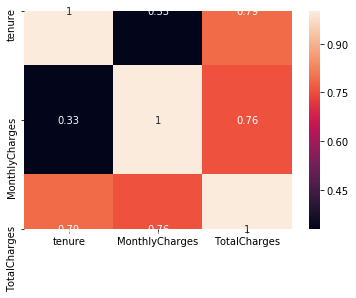

In [42]:
sns.heatmap(df_0.corr(), annot = True)

In [46]:
df_1.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.401286,0.954017
MonthlyCharges,0.401286,1.000000,0.545772
TotalCharges,0.954017,0.545772,1.000000


In [45]:
df_1.corr().unstack().reset_index()

,level_0,level_1,0
0,tenure,tenure,1.000000
1,tenure,MonthlyCharges,0.401286
2,tenure,TotalCharges,0.954017
3,MonthlyCharges,tenure,0.401286
4,MonthlyCharges,MonthlyCharges,1.000000
5,MonthlyCharges,TotalCharges,0.545772
6,TotalCharges,tenure,0.954017
7,TotalCharges,MonthlyCharges,0.545772
8,TotalCharges,TotalCharges,1.000000


In [60]:
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.401286,0.954017
MonthlyCharges,0.401286,1.000000,0.545772
TotalCharges,0.954017,0.545772,1.000000


In [101]:
np.triu(np.ones(corr.shape), k=-1)

array([[1., 1., 1.],
       [1., 1., 1.],
       [0., 1., 1.]])

In [52]:
corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

,tenure,MonthlyCharges,TotalCharges
tenure,NaN,0.401286,0.954017
MonthlyCharges,NaN,NaN,0.545772
TotalCharges,NaN,NaN,NaN


In [62]:
np.triu(np.ones(corr.shape), k=1).astype(np.bool)

array([[False,  True,  True],
       [False, False,  True],
       [False, False, False]])

In [70]:
corr = df_1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index().dropna(subset = [0])
corr_df.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df['Corr_abs'] = abs(corr_df['Correlation_Value'])
corr_df.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df

,VAR1,VAR2,Correlation_Value,Corr_abs
6,TotalCharges,tenure,0.954017,0.954017
7,TotalCharges,MonthlyCharges,0.545772,0.545772
3,MonthlyCharges,tenure,0.401286,0.401286


In [69]:
corr = df_0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index().dropna(subset = [0])
corr_df.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df['Corr_abs'] = abs(corr_df['Correlation_Value'])
corr_df.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df

,VAR1,VAR2,Correlation_Value,Corr_abs
6,TotalCharges,tenure,0.793176,0.793176
7,TotalCharges,MonthlyCharges,0.757110,0.757110
3,MonthlyCharges,tenure,0.330892,0.330892


## Univariate, Bivariate Analysis

Univariate:
- Continuous Variable
- Categorical Variable

Bivariate Anlysis:
- Conti-Conti
- Categorical-Categorical
- Conti-Categorical

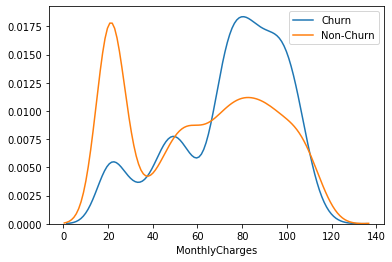

In [73]:
# Uni-Conti
# Histogram

# df_1: Churned
# df_0: Not Churn

sns.distplot(df_1['MonthlyCharges'], hist = False, label = 'Churn')
sns.distplot(df_0['MonthlyCharges'], hist = False, label = 'Non-Churn')

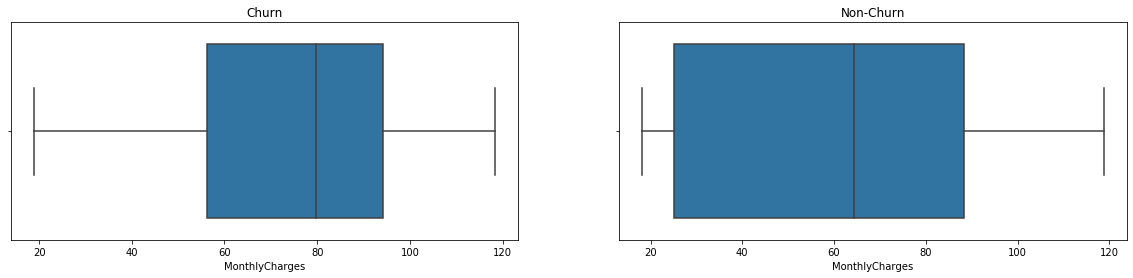

In [78]:
# Uni-Conti
# Boxplots
plt.figure(figsize = (20, 4))
plt.subplot(1,2,1)
plt.title("Churn")
sns.boxplot(df_1['MonthlyCharges'])

plt.subplot(1,2,2)
plt.title("Non-Churn")
sns.boxplot(df_0['MonthlyCharges'])

In [79]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Monthly_bucket'],
      dtype='object')

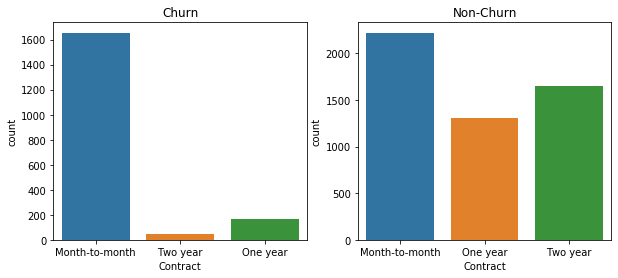

In [82]:
## Uni-Categorical

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Churn")
sns.countplot(df_1['Contract'])


plt.subplot(1,2,2)
plt.title("Non-Churn")
sns.countplot(df_0['Contract'])

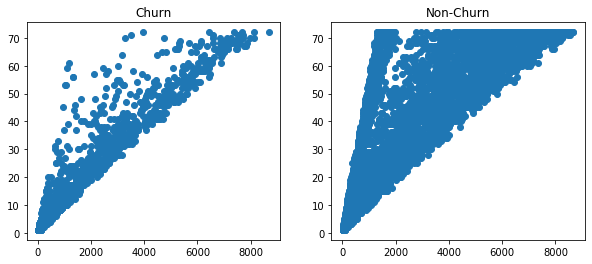

In [83]:
## Bivariate - Conti-Conti
# Scatter

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Churn")
plt.scatter(df_1['TotalCharges'], df_1['tenure'])


plt.subplot(1,2,2)
plt.title("Non-Churn")
plt.scatter(df_0['TotalCharges'], df_0['tenure'])

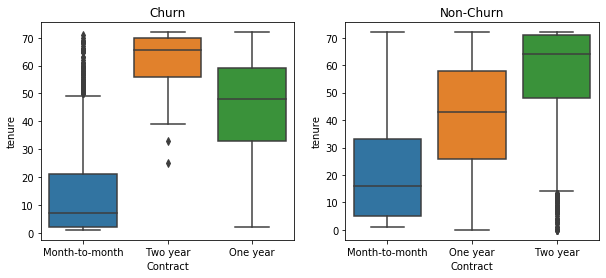

In [84]:
# Bivariate - Conti-Categorical
plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Churn")
sns.boxplot(x = "Contract", y = 'tenure', data = df_1)


plt.subplot(1,2,2)
plt.title("Non-Churn")
sns.boxplot(x = "Contract", y = 'tenure', data = df_0)

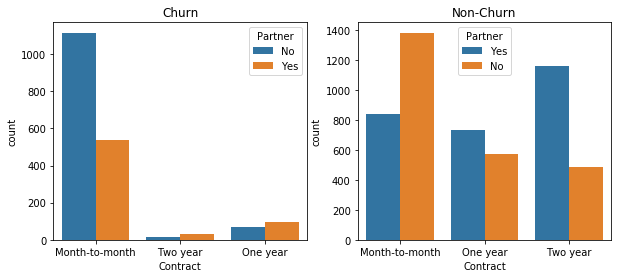

In [85]:
# Bivariate - Cat-Cat

plt.figure(figsize = (10, 4))
plt.subplot(1,2,1)
plt.title("Churn")
sns.countplot(x = 'Contract', hue = 'Partner', data = df_1)


plt.subplot(1,2,2)
plt.title("Non-Churn")
sns.countplot(x = 'Contract', hue = 'Partner', data = df_0)